# Proyecto Final
## Análisis y exploración de datos

En este notebook desarrollaremos la primera parte del proyecto final. El objetivo general es **predecir el salario de una oferta de trabajo de ciencia de datos** a partir de sus características. En esta primera sección realizaremos un análisis exploratorio del conjunto de datos, como indican las instrucciones del proyecto.

Los subapartados que abordaremos son:

1. **Carga y exploración del conjunto de datos**  
2. **Análisis estadístico**  
3. **Visualización de distribuciones**  
4. **Análisis de la variable objetivo** (`Salary Estimate`)


## Descripción del dataset

## 1.1 Carga y exploración del conjunto de datos

Primero importaremos las librerías necesarias y cargaremos el archivo `glassdoor_jobs.csv` en un `DataFrame` de pandas. Revisaremos sus primeras filas, su forma (número de filas y columnas) y los nombres de cada columna para entender qué información incluye el dataset.


In [1]:
# Importar librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'Dataset/glassdoor_jobs.csv'
data = pd.read_csv(file_path)

data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [3]:
# Mostrar la forma del Dataset y las columnas disponibles
print(f'Número de filas y columnas: {data.shape}')

print("\nNombres de las columnas:")
for col in data.columns:
    print('-', col)


Número de filas y columnas: (956, 14)

Nombres de las columnas:
- Job Title
- Salary Estimate
- Job Description
- Rating
- Company Name
- Location
- Headquarters
- Size
- Founded
- Type of ownership
- Industry
- Sector
- Revenue
- Competitors


Observaciones iniciales:
Tras la carga inicial se observa que el Dataset contiene 956 filas y 14 columnas. Las columnas abarcan información del puesto (`Job Title`), la estimación de sueldo (`Salary Estimate`), descripción del trabajo (`Job Description`), calificación de la empresa (`Rating`), ubicación (`Location`), año de fundación (`Founded`), sector, industria y otros.


In [4]:
# Obtener información detallada de tipos de datos y valores no nulos 
# Esto sirve para identificar columnas con datos faltantes o tipos incorrectos
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          956 non-null    object 
 1   Salary Estimate    956 non-null    object 
 2   Job Description    956 non-null    object 
 3   Rating             956 non-null    float64
 4   Company Name       956 non-null    object 
 5   Location           956 non-null    object 
 6   Headquarters       956 non-null    object 
 7   Size               956 non-null    object 
 8   Founded            956 non-null    int64  
 9   Type of ownership  956 non-null    object 
 10  Industry           956 non-null    object 
 11  Sector             956 non-null    object 
 12  Revenue            956 non-null    object 
 13  Competitors        956 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 104.7+ KB


## 1.2 Análisis estadístico

Vamos a calcular un resumen estadístico de las variables numéricas y contar cuántos valores diferentes existen en cada columna categórica. Esto nos ayudará a entender distribuciones generales, rangos y posibles valores atípicos.


In [5]:
# Seleccionar columnas numéricas y obtener resumen estadístico
numeric_cols = data.select_dtypes(include=[np.number])
numeric_summary = numeric_cols.describe().T
numeric_summary

,count,mean,std,min,25%,50%,75%,max
Rating,956.0,3.601255,1.067619,-1.0,3.3,3.8,4.2,5.0
Founded,956.0,1774.605649,598.942517,-1.0,1937.0,1992.0,2008.0,2019.0


In [6]:
# Seleccionar columnas categóricas y contar valores únicos
categorical_cols = data.select_dtypes(exclude=[np.number])
categorical_summary = {col: data[col].nunique() for col in categorical_cols.columns}
categorical_summary

{'Job Title': 328,
 'Salary Estimate': 417,
 'Job Description': 596,
 'Company Name': 448,
 'Location': 237,
 'Headquarters': 235,
 'Size': 9,
 'Type of ownership': 13,
 'Industry': 63,
 'Sector': 25,
 'Revenue': 14,
 'Competitors': 149}

Las estadísticas muestran, por ejemplo, que la columna `Rating` tiene una media cercana a 3.6, con valores mínimos y máximos de −1 y 5 respectivamente (−1 indica valor desconocido). La columna `Founded` abarca desde valores negativos (sin dato) hasta 2019 y tiene una **mediana en 1999**, lo que indica que la mayoría de las empresas fueron fundadas en las últimas décadas.  
Para las columnas categóricas, `Sector` presenta 25 categorías distintas y `Job Title` 328 títulos, lo que sugiere una gran variedad de cargos.


## 1.3 Visualización de distribuciones

Para comprender la forma de las distribuciones de las variables principales, realizaremos algunos gráficos:

- Histograma de la calificación de las empresas (`Rating`).
- Histograma del año de fundación (`Founded`).
- Gráfica de barras de los 10 sectores (`Sector`) con mayor número de ofertas.

Estos gráficos permiten visualizar concentraciones de datos y detectar posibles outliers.



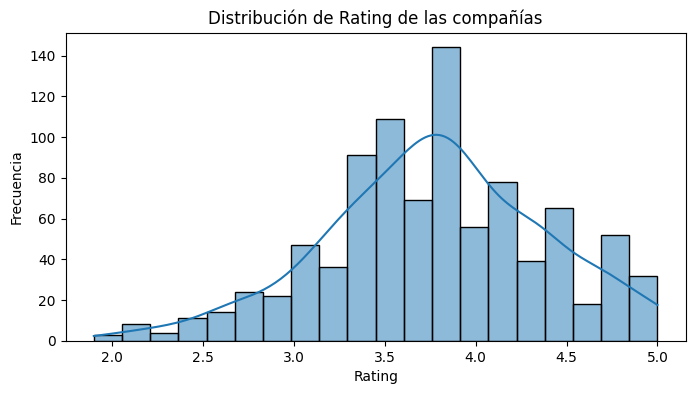

In [7]:
# Histograma de Ratings (excluyendo valor -1)
ratings_clean = data['Rating'].replace(-1, np.nan).dropna()

plt.figure(figsize=(8, 4))
sns.histplot(ratings_clean, bins=20, kde=True)
plt.title('Distribución de Rating de las compañías')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()


El histograma muestra que la mayor parte de las empresas tiene valoraciones entre 3 y 4.5. El pico principal está alrededor de 3.8, lo que sugiere que las compañías que ofrecen puestos de ciencia de datos suelen estar bien valoradas. Hay pocas empresas con ratings bajos (2–2.5), y la cola hacia valores altos se extiende hasta el 5. Estos datos concuerdan con la estadística descriptiva que señala una media de 3.6 y mediana de 3.8.
Este tipo de visualización es útil para detectar asimetrías y posibles outliers; en tu gráfico, no se aprecian picos extremos, lo que indica una distribución relativamente concentrada alrededor de valores medios-altos.

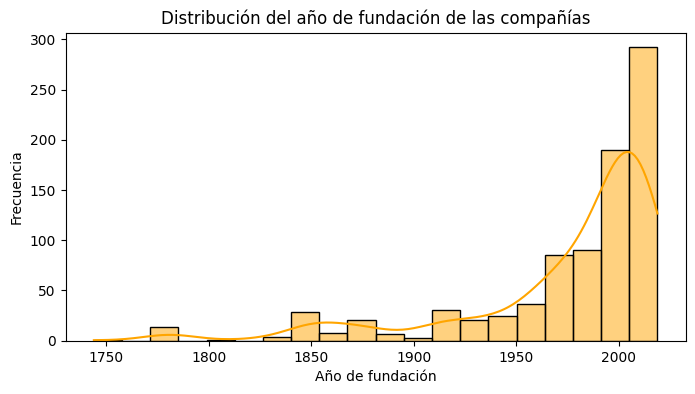

In [8]:
founded_clean = data['Founded'].replace(-1, np.nan).dropna() # Eliminar valores -1 que indican datos faltantes 
plt.figure(figsize=(8, 4))
sns.histplot(founded_clean, bins=20, kde=True, color='orange')
plt.title('Distribución del año de fundación de las compañías')
plt.xlabel('Año de fundación')
plt.ylabel('Frecuencia')
plt.show()


La distribución resultante muestra que la mayoría de las empresas del dataset fueron fundadas en las últimas décadas, especialmente a partir del año 2000: el pico más alto se encuentra alrededor de 2000‑2005. Hay un incremento gradual desde mediados del siglo XX hasta alcanzar este pico. Se observan algunos valores aislados en el siglo XIX e incluso finales del XVIII, que corresponden a empresas históricas; esos son los outliers que hacen que la media se sitúe en torno a 1774, tal como se vio en la estadística descriptiva.
En conjunto, el gráfico sugiere que las ofertas de empleo de ciencia de datos están dominadas por compañías relativamente jóvenes, lo que puede tener implicaciones en las políticas salariales y en la forma de describir los puestos.

C:\Users\juanp\AppData\Local\Temp\ipykernel_18360\3733530939.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sectors.values, y=top_sectors.index, palette='viridis')


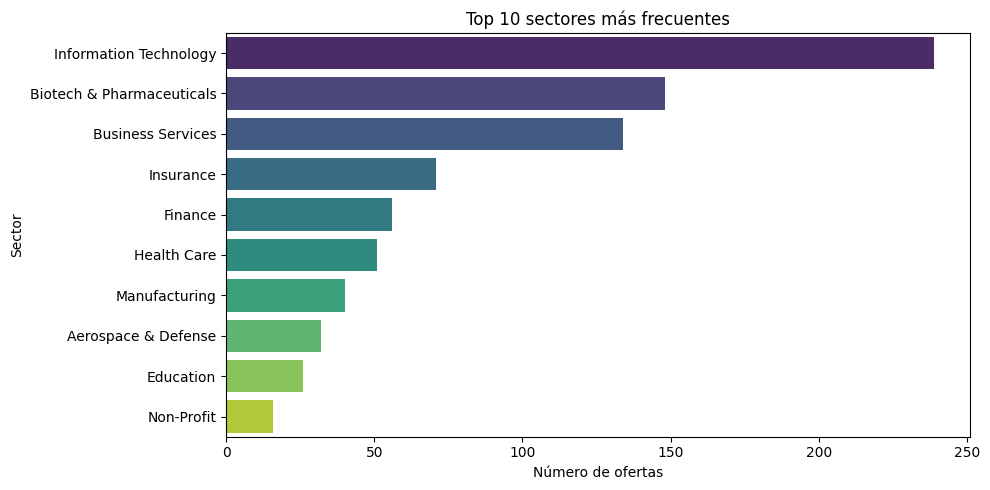

In [9]:
# Top 10 sectores más frecuentes (excluyendo '-1' y variantes)
sector_clean = (
    data['Sector']
    .replace({'-1': np.nan})
    .dropna()
) # Eliminar valores como (-1)

plt.figure(figsize=(10, 5))
top_sectors = sector_clean.value_counts().nlargest(10)
sns.barplot(x=top_sectors.values, y=top_sectors.index, palette='viridis')
plt.title('Top 10 sectores más frecuentes')
plt.xlabel('Número de ofertas')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()


Los histogramas muestran que la mayoría de las empresas tienen ratings entre 3 y 4.5, y que muchas fueron fundadas después de 1950. La gráfica de sectores revela cuáles áreas de la industria concentran la mayor cantidad de ofertas de ciencia de datos.


## 1.4 Análisis de la variable objetivo (Salary Estimate)

La variable `Salary Estimate` contiene rangos de sueldo expresados en miles de dólares (K) y, en algunos casos, se indica si el sueldo es por hora o provisto por el empleador. Para analizar numéricamente esta variable, definimos una función que extrae el salario mínimo y máximo de cada rango, eliminando textos adicionales, y calcula un salario promedio.


In [10]:
# Definir función de parseo de salarios ()
def parse_salary(s):
    s = str(s)
    if s == '-1' or s.lower() == 'nan':
        return np.nan, np.nan, np.nan
    # Eliminar textos auxiliares
    s = s.replace('Employer Provided Salary:', '')
    s = s.replace('(Glassdoor est.)', '')
    s = s.replace('(Employer est.)', '')
    s = s.replace('$', '').replace(',', '')
    s_lower = s.lower()
    hourly = 'per hour' in s_lower
    s_lower = s_lower.replace('per hour', '')
    # Separar mínimo y máximo
    if '-' in s_lower:
        low_str, high_str = s_lower.split('-')
        try:
            low = float(low_str.strip().replace('k', '')) * 1000
            high = float(high_str.strip().replace('k', '')) * 1000
        except ValueError:
            return np.nan, np.nan, np.nan
        # Convertir a anual si es por hora (aprox. 40 horas semana * 52 semanas)
        if hourly:
            low = low / 1000
            high = high / 1000
            low *= 40 * 52
            high *= 40 * 52
        avg = (low + high) / 2
        return low, high, avg
    return np.nan, np.nan, np.nan

# Aplicar la función y crear nuevas columnas
data[['min_salary', 'max_salary', 'avg_salary']] = data['Salary Estimate'].apply(lambda x: pd.Series(parse_salary(x)))

# Mostrar algunas filas de ejemplo
data[['Salary Estimate', 'min_salary', 'max_salary', 'avg_salary']].head(11)


,Salary Estimate,min_salary,max_salary,avg_salary
0,$53K-$91K (Glassdoor est.),53000.0,91000.0,72000.0
1,$63K-$112K (Glassdoor est.),63000.0,112000.0,87500.0
2,$80K-$90K (Glassdoor est.),80000.0,90000.0,85000.0
3,$56K-$97K (Glassdoor est.),56000.0,97000.0,76500.0
4,$86K-$143K (Glassdoor est.),86000.0,143000.0,114500.0
5,$71K-$119K (Glassdoor est.),71000.0,119000.0,95000.0
6,$54K-$93K (Glassdoor est.),54000.0,93000.0,73500.0
7,$86K-$142K (Glassdoor est.),86000.0,142000.0,114000.0
8,$38K-$84K (Glassdoor est.),38000.0,84000.0,61000.0
9,$120K-$160K (Glassdoor est.),120000.0,160000.0,140000.0


Tras cargar el dataset, la columna `Salary Estimate` contiene rangos salariales expresados en miles de dólares (por ejemplo, **“$53K‑$91K (Glassdoor est.)”**) e incluso algunos sueldos “por hora” o marcados como provistos por el empleador. Para poder trabajar con esos valores de forma cuantitativa, se define la función `parse_salary` que realiza lo siguiente:

1. **Detección de valores faltantes**: si la cadena es `"-1"` o `"nan"`, devuelve `(NaN, NaN, NaN)` para indicar que no hay salario válido.  
2. **Limpieza de texto**: elimina términos auxiliares como “Employer Provided Salary:”, “(Glassdoor est.)” o “(Employer est.)” que aparecen en las estimaciones de Glassdoor.  
3. **Identificación de sueldos por hora**: convierte la cadena a minúsculas y comprueba si contiene la frase `"per hour"`. En ese caso marca la variable `hourly = True` y elimina esa frase del texto para facilitar el parseo.  
4. **Extracción del rango**: divide la cadena por el guion `"-"` para separar el mínimo y el máximo. A cada parte le elimina la letra `k` y la convierte a número, multiplicando por 1000 para pasar de miles a unidades.  
5. **Conversión a salario anual**: si el sueldo era por hora (`hourly = True`), multiplica los valores por `40 × 52` (40 horas semanales × 52 semanas) para estimar el ingreso anual.  
6. **Cálculo del promedio**: calcula la media entre el salario mínimo y el máximo.  
7. **Retorno**: devuelve una tupla `(min_salary, max_salary, avg_salary)`. Si no hay rango válido, devuelve `(NaN, NaN, NaN)`.

Posteriormente se aplica esta función a cada fila de la columna `Salary Estimate` con `data['Salary Estimate'].apply(...)` y se crean tres nuevas columnas: `min_salary`, `max_salary` y `avg_salary`. La tabla resultante muestra estas columnas junto a la estimación original para comprobar que el parseo es correcto. Por ejemplo, el rango **“$53K‑$91K (Glassdoor est.)”** se convierte en un salario mínimo de 53 000 USD, un máximo de 91 000 USD y un salario promedio de 72 000 USD. Estas columnas numéricas serán la base para el análisis estadístico y el entrenamiento del modelo en las siguientes etapas del proyecto.


In [11]:
data['avg_salary'].describe()  # Ignora los valores NaN

count       742.000000
mean     101499.326146
std       37463.032093
min       15500.000000
25%       73500.000000
50%       97500.000000
75%      122500.000000
max      254000.000000
Name: avg_salary, dtype: float64

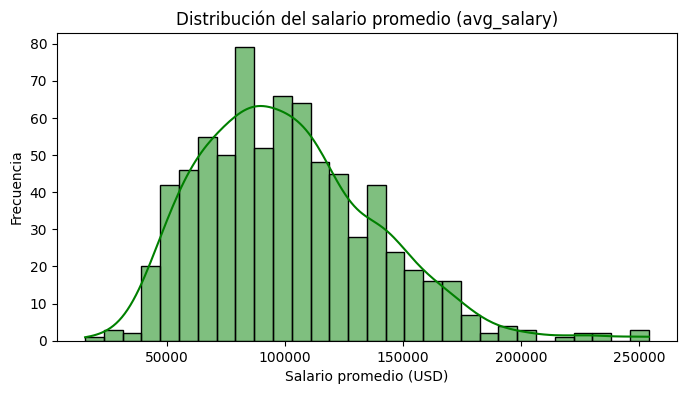

In [12]:
# Histograma del salario promedio
plt.figure(figsize=(8, 4))
sns.histplot(data['avg_salary'].dropna(), bins=30, color='green', kde=True)
plt.title('Distribución del salario promedio (avg_salary)')
plt.xlabel('Salario promedio (USD)') # Salario promedio en dólares estadounidenses
plt.ylabel('Frecuencia') # Las veces que se repite un salario en el dataset
plt.show()
